### **The Dataset used for this challenge is [Heart Disease UCI](https://www.kaggle.com/ronitf/heart-disease-uci)**

### Import Libraries

In [1]:
# Import the necessary packages used in this notebook
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

['heart.csv']


### Read the dataset and save to variable datafr

In [2]:
datafr = pd.read_csv("../input/heart.csv", error_bad_lines=False)

### Displaying the structure of dataset

In [3]:
display(datafr.head(10))

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


### Identifying the shape of the dataset

In [4]:
# Dimension of the datatset
print("Dimension of the dataset is: ",datafr.shape)
# Check if any column has missing value
datafr.isnull().sum()

Dimension of the dataset is:  (303, 14)


age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

Since there are no NaNs here thus we do not require to impute any missing values

### Description of each column
* age: age in years
* sex: female=0; male=1
* cp: chest pain type (4 levels)
* trestbps: resting blood pressure (in mm Hg on admission to the hospital)
* chol: serum cholestoral in mg/dl
* fbs: (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
* restecg: resting electrocardiographic results (3 levels)
* thalach: maximum heart rate achieved
* exang: exercise induced angina (1 = yes; 0 = no)
* oldpeak: ST depression induced by exercise relative to rest
* slope: the slope of the peak exercise ST segment
* ca: number of major vessels (0-3) colored by flourosopy (3 levels)
* thal: 3 = normal; 6 = fixed defect; 7 = reversable defect
* target: (class variable) with 1 or 0

### Categorical attributes are :-
"cp","fbs", "restecg", "ca", "thal"

### Numeric attributes are :-
"age", "sex", "trestbps", "chol", "thalach", "exang", "oldpeak", "slope"

### Visualizing the ratio of dataset based on attribute sex

([<matplotlib.patches.Wedge at 0x7f7c3f33b080>,
 [Text(-0.9228481310997082, -0.5986245291714798, 'Male'),
  Text(1.006743476887612, 0.6530448466562173, 'Female')],
 [Text(-0.503371707872568, -0.32652247045717075, '68.3%'),
  Text(0.5872670281844402, 0.38094282721612677, '31.7%')])

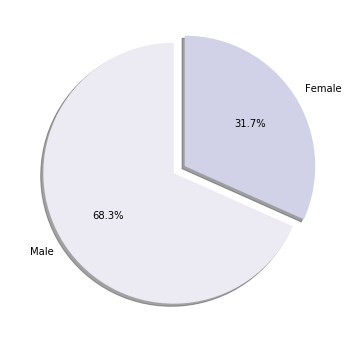

In [5]:
male =len(datafr[datafr['sex'] == 1])
female = len(datafr[datafr['sex']== 0])

# Data to plot
labels = 'Male','Female'
sizes = [male,female]

# Plot
plt.figure(figsize=(6,6))
plt.pie(sizes, explode=(0, 0.1), labels=labels, colors=sns.color_palette("Purples"),
autopct='%1.1f%%', shadow=True, startangle=90)

### Plot displaying male and female with potential heart disease based on age

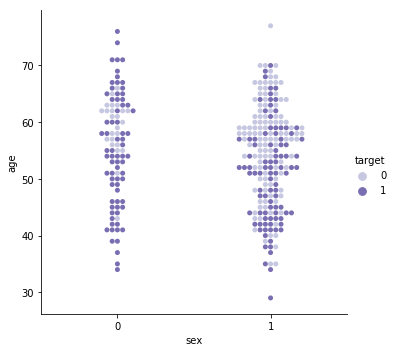

In [6]:
sns.catplot(x="sex", y="age", hue="target", kind="swarm", data=datafr, palette='Purples')

### Visualizing the ratio of different chest pain types in the dataset

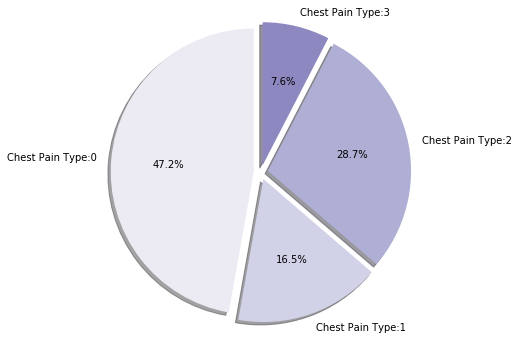

In [7]:
# Data to plot
labels = 'Chest Pain Type:0','Chest Pain Type:1','Chest Pain Type:2','Chest Pain Type:3'
sizes = [len(datafr[datafr['cp'] == 0]),len(datafr[datafr['cp'] == 1]),
         len(datafr[datafr['cp'] == 2]),
         len(datafr[datafr['cp'] == 3])]

plt.figure(figsize=(6,6))

# Plot
plt.pie(sizes, explode=(0.05, 0.05, 0.05, 0.05), labels=labels, colors=sns.color_palette("Purples"),
autopct='%1.1f%%', shadow=True, startangle=90)
 
plt.axis('equal')
plt.show()

### Plot displaying potential of heart disease based on various levels of chest pain types by age

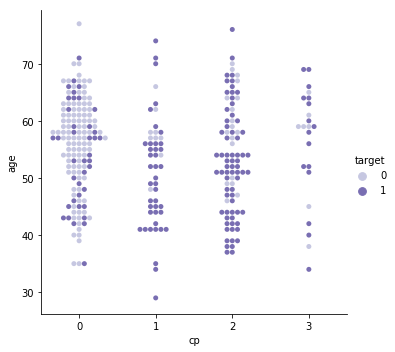

In [8]:
sns.catplot(x="cp", y="age", hue="target", kind="swarm", data=datafr, palette='Purples')

Text(0.5, 1.0, 'Chest Pain vs Heart Disease')

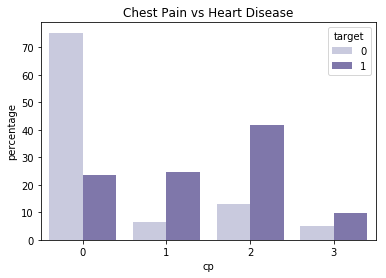

In [9]:
"""
Normalizing the values and then making it as a DataFrame and then plotting using sns.barplot.
"""
temp = (datafr.groupby(['target']))['cp'].value_counts(normalize=True)\
.mul(100).reset_index(name = "percentage")
sns.barplot(x = "cp", y = "percentage", hue = "target", data = temp, palette='Purples')\
.set_title("Chest Pain vs Heart Disease")

### Visualizing the ratio of dataset based on (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)

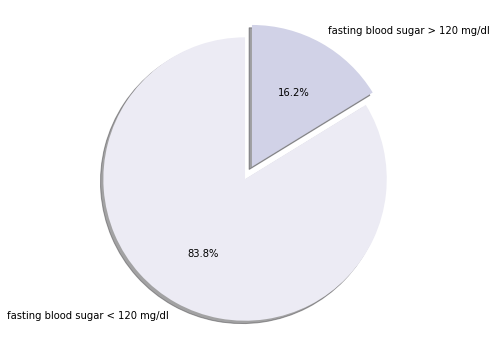

In [10]:
# Data to plot
labels = 'fasting blood sugar < 120 mg/dl','fasting blood sugar > 120 mg/dl'
sizes = [len(datafr[datafr['fbs'] == 0]),len(datafr[datafr['cp'] == 1])]

plt.figure(figsize=(6,6))
 
# Plot
plt.pie(sizes, explode=(0.05, 0.05), labels=labels, colors=sns.color_palette("Purples"),
autopct='%1.1f%%', shadow=True, startangle=90)
 
plt.axis('equal')
plt.show()   

### Checking the distribution of feature 'thalach: maximum heart rate achieved'

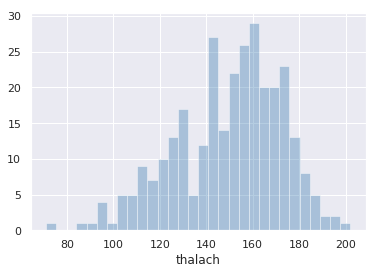

In [11]:
sns.set(style="darkgrid")
sns.distplot(datafr['thalach'],kde=False,bins=30,color='steelblue')

The distribution is normal indicating most population fall between 140-180 with some left tail indicating few outliers which we can validate once we create a scatterplot  with residuals, leverage and cook's distance.

### Checking the distribution of feature 'chol: serum cholestoral in mg/dl'

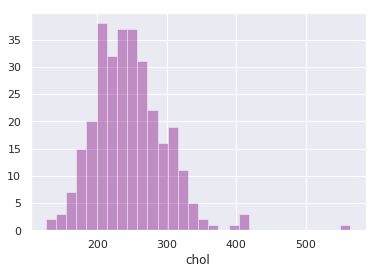

In [12]:
sns.distplot(datafr['chol'],kde=False,bins=30,color="purple")

The distribution is normal indicating most population falls between 200-300 which some right tail indicating few outliers which we can validate once we create a scatterplot with residuals, leverage and cook's distance.

### Visualizing the distribution of people having heart disease based on age

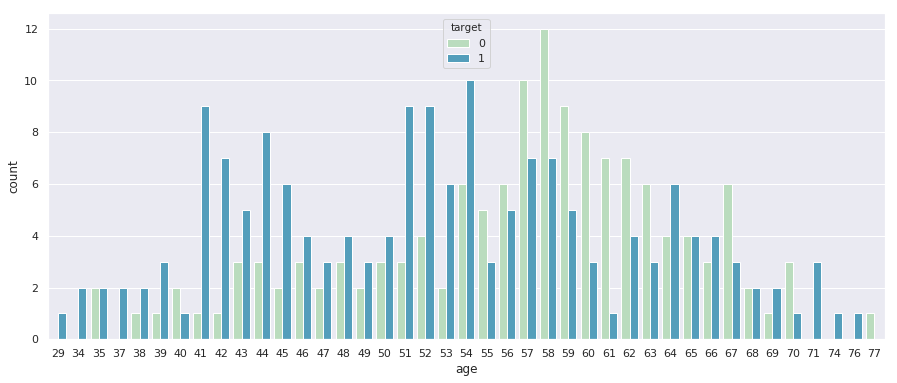

In [13]:
plt.figure(figsize=(15,6))
sns.countplot(x='age',data = datafr, hue = 'target',palette='GnBu')
plt.show()

### Splitting the dataset into test and train

In [14]:
# Predictor variables
X= datafr.drop('target',axis=1)
# Target or Class variable
Y=datafr['target']

In [15]:
# Let's using scikit learn to split our dataset
from sklearn.model_selection import train_test_split
# Using 70:30 ratio for train:test
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=.3,random_state=400)

In [16]:
X_train.shape

(212, 13)

In [17]:
X_test.shape

(91, 13)

### Preprocessing and Cleaning

In [18]:
# Using StandardScaler to scale features
from sklearn.preprocessing import StandardScaler

# In the given dataset categorical features are already one-hot encoded, thus we do not reuqire to one-hot encode them
# from sklearn.preprocessing import LabelEncoder
# from sklearn.preprocessing import OneHotEncoder

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_train = pd.DataFrame(X_train_scaled)

X_test_scaled = scaler.transform(X_test)
X_test = pd.DataFrame(X_test_scaled)

/opt/conda/lib/python3.6/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/opt/conda/lib/python3.6/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:13: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  del sys.path[0]


### Define a cross-validation function
We are using cross-validation to predict our training accuracy in order to avoid underfitting and overfitting of our model. The closer the results of cross-validation accracy and test accuracy will determine the ideal fit of our model.

In [19]:
from sklearn.model_selection import cross_val_score
# Using 10 folds cross-validation
def CrossVal(trainX,trainY,model):
    accuracy=cross_val_score(model,trainX , trainY, cv=10, scoring='accuracy')
    return(accuracy)

### 1) Using our first Machine Learning Approach: SVM

In [20]:
# Start with Support Vector Machine for Binary Classification
from sklearn import svm
clf = svm.SVC(gamma='scale')
# Creare a model with X_train and Y_train data
clf.fit(X_train,Y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [21]:
# Run the model on X_test to predict the target labels. Use cross-validation accuracy to check if model overfits or underfits
predict1 = clf.predict(X_test)
clf=svm.SVC(C=0.2,probability=True,kernel='rbf',gamma='scale')
score_clf=CrossVal(X_train,Y_train,clf)
print("Cross-Validation accuracy is {:.2f}%".format(score_clf.mean()*100))

Cross-Validation accuracy is 81.57%


Test Accuracy using SVM Model: 84.62%


Text(0.5, 1.0, 'F1 Score for SVM model is 0.87')

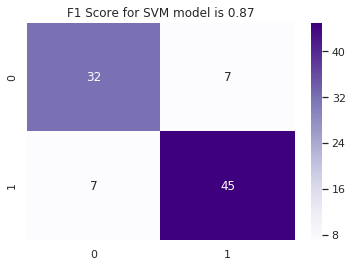

In [22]:
# Compare the predicted target labels with Y_test
from sklearn.metrics import accuracy_score,confusion_matrix, f1_score
print("Test Accuracy using SVM Model: {:.2f}%".format(accuracy_score(Y_test,predict1)*100))
# assign cnf_matrix with result of confusion_matrix array
cnf_matrix = confusion_matrix(Y_test,predict1)
#create a heat map
sns.heatmap(pd.DataFrame(cnf_matrix), annot = True, cmap = 'Purples', fmt = 'd')
svm_f1=f1_score(Y_test,predict1)
plt.title('F1 Score for SVM model is {:.2f}'.format(svm_f1))

### 2) Using our second Machine Learning Approach: Random Forest

In [23]:
# Next we take Random Forest Model (Ensemble) for Binary Classification
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators = 13,random_state = 40)
# Creare a model with X_train and Y_train data
rf.fit(X_train,Y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=13, n_jobs=None,
            oob_score=False, random_state=40, verbose=0, warm_start=False)

In [24]:
# Run the model on X_test to predict the target labels. Use cross-validation accuracy to check if model overfits or underfits
predict2 = rf.predict(X_test)
rf=RandomForestClassifier(n_estimators=13, n_jobs=-1, random_state=40)
score_rf= CrossVal(X_train,Y_train,rf)
print('Cross-Validation accuracy is {:.2f}%'.format(score_rf.mean()*100))

Cross-Validation accuracy is 82.05%


Accuracy using Random Forest Model: 74.73%


Text(0.5, 1.0, 'F1 Score for Random Forest model is 0.78')

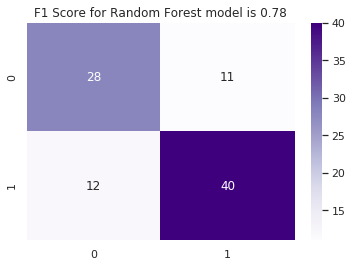

In [25]:
# Compare the predicted target labels with Y_test
from sklearn.metrics import accuracy_score,confusion_matrix, f1_score
print("Accuracy using Random Forest Model: {:.2f}%".format(accuracy_score(Y_test,predict2)*100))
# assign cnf_matrix with result of confusion_matrix array
cnf_matrix = confusion_matrix(Y_test,predict2)
#create a heat map
sns.heatmap(pd.DataFrame(cnf_matrix), annot = True, cmap = 'Purples', fmt = 'd')
rf_f1=f1_score(Y_test,predict2)
plt.title('F1 Score for Random Forest model is {:.2f}'.format(rf_f1))

### 3) Using our third Machine Learning Approach: Logistic Regression

In [26]:
# Next we take Logistic Regression for Binary Classification
from sklearn.linear_model import LogisticRegression
logit=LogisticRegression(class_weight='balanced', tol=1e-10)

# Creare a model with X_train and Y_train data
logit.fit(X_train,Y_train)

/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='warn', n_jobs=None, penalty='l2', random_state=None,
          solver='warn', tol=1e-10, verbose=0, warm_start=False)

In [27]:
# Run the model on X_test to predict the target labels. Use cross-validation accuracy to check if model overfits or underfits
predict3 = logit.predict(X_test)
score_logit= CrossVal(X_train,Y_train,logit)
print('Cross-Validation accuracy is {:.2f}%'.format(score_logit.mean()*100))

Cross-Validation accuracy is 83.06%


/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  Futur

Accuracy using Logistic Regression Model: 80.22%


Text(0.5, 1.0, 'F1 Score for Logistic Regression model is 0.83')

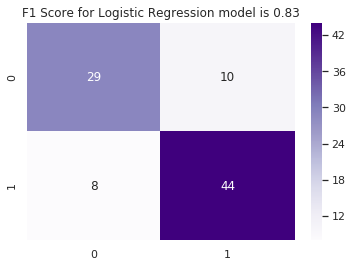

In [28]:
# Compare the predicted target labels with Y_test
from sklearn.metrics import accuracy_score,confusion_matrix, f1_score
print("Accuracy using Logistic Regression Model: {:.2f}%".format(accuracy_score(Y_test,predict3)*100))
# assign cnf_matrix with result of confusion_matrix array
cnf_matrix = confusion_matrix(Y_test,predict3)
#create a heat map
sns.heatmap(pd.DataFrame(cnf_matrix), annot = True, cmap = 'Purples', fmt = 'd')
logit_f1=f1_score(Y_test,predict3)
plt.title('F1 Score for Logistic Regression model is {:.2f}'.format(logit_f1))

### 4) Using our forth Machine Learning Approach: KNN
In order to identify the ideal number of neighbours for KNN, we first calculate the error percentage each neighbour might result in. The lower the error the better our model fits on that current set of neighbours.

In [29]:
# Next we take KNN Classifier for Binary Classification
from sklearn.neighbors import KNeighborsClassifier

# Create an empty list to hold error values
error = []

# Calculating error for K values between 1 and 30
for i in range(1, 30):  
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, Y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != Y_test))

Text(0, 0.5, 'Mean Error')

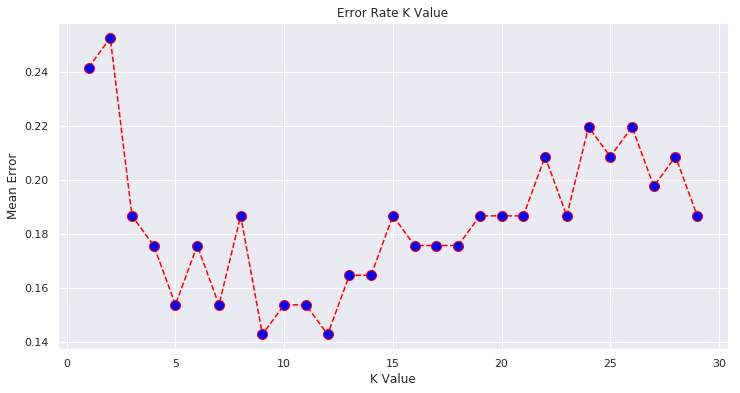

In [30]:
plt.figure(figsize=(12, 6))  
plt.plot(range(1, 30), error, color='red', linestyle='dashed', marker='o',  
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')  
plt.xlabel('K Value')  
plt.ylabel('Mean Error')  

From the above figure we can see that we get a minimum error of around 0.14 when k is either 9 or 12.

In [31]:

knn=KNeighborsClassifier(algorithm='auto',n_neighbors= 9)
# Creare a model with X_train and Y_train data
knn.fit(X_train,Y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=9, p=2,
           weights='uniform')

In [32]:
# Run the model on X_test to predict the target labels. Use cross-validation accuracy to check if model overfits or underfits
predict4 = knn.predict(X_test)
score_knn= CrossVal(X_train,Y_train,knn)
print('Cross-Validation accuracy is {:.2f}%'.format(score_knn.mean()*100))

Cross-Validation accuracy is 81.16%


Accuracy using K Nearest Neighbours Model: 85.71%


Text(0.5, 1.0, 'F1 Score for K Nearest Neighbour model is 0.88')

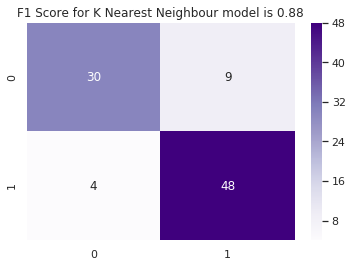

In [33]:
# Compare the predicted target labels with Y_test
from sklearn.metrics import accuracy_score,confusion_matrix, f1_score
print("Accuracy using K Nearest Neighbours Model: {:.2f}%".format(accuracy_score(Y_test,predict4)*100))
# assign cnf_matrix with result of confusion_matrix array
cnf_matrix = confusion_matrix(Y_test,predict4)
#create a heat map
sns.heatmap(pd.DataFrame(cnf_matrix), annot = True, cmap = 'Purples', fmt = 'd')
knn_f1=f1_score(Y_test,predict4)
plt.title('F1 Score for K Nearest Neighbour model is {:.2f}'.format(knn_f1))

### 5) Using our fifth Machine Learning Approach: AdaBoost

In [34]:
# Next we take AdaBoost for Binary Classification
from sklearn.ensemble import AdaBoostClassifier
# Using Random Forest model 'rf' for boosting
ada=AdaBoostClassifier(rf,n_estimators=100, random_state=40, learning_rate=0.1)
# Creare a model with X_train and Y_train data
ada.fit(X_train,Y_train)


AdaBoostClassifier(algorithm='SAMME.R',
          base_estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=13, n_jobs=-1,
            oob_score=False, random_state=40, verbose=0, warm_start=False),
          learning_rate=0.1, n_estimators=100, random_state=40)

In [35]:
# Run the model on X_test to predict the target labels. Use cross-validation accuracy to check if model overfits or underfits
predict5 = ada.predict(X_test)
score_ada= CrossVal(X_train,Y_train,ada)
print('Cross-Validation accuracy is {:.2f}%'.format(score_ada.mean()*100))

Cross-Validation accuracy is 79.73%


Accuracy using AdaBoost Model: 76.92%


Text(0.5, 1.0, 'F1 Score for AdaBoost model is 0.80')

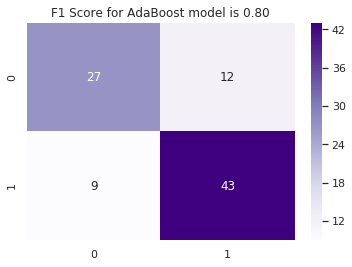

In [36]:
# Compare the predicted target labels with Y_test
from sklearn.metrics import accuracy_score,confusion_matrix, f1_score
print("Accuracy using AdaBoost Model: {:.2f}%".format(accuracy_score(Y_test,predict5)*100))
# assign cnf_matrix with result of confusion_matrix array
cnf_matrix = confusion_matrix(Y_test,predict5)
#create a heat map
sns.heatmap(pd.DataFrame(cnf_matrix), annot = True, cmap = 'Purples', fmt = 'd')
ada_f1=f1_score(Y_test,predict5)
plt.title('F1 Score for AdaBoost model is {:.2f}'.format(ada_f1))